# [Quantstats](https://github.com/ranaroussi/quantstats) Reloaded Version
https://github.com/HoncyLee/QuantstatsReload
- Credit: Ran Aroussi

<pre>Last update: 2025-07-08

Fixed bugs and adopted to latest Numpy, Pandas and Seaborn

Quantstats ver:	 0.0.65 - Reloaded by Honcy Lee
Matplotlib ver:	 3.8.0
Seaborn ver:	 0.13.2
Numpy ver:	 1.26.4
Pandas ver:	 2.2.3
yfinance ver:	 0.2.64</pre>

This document natively based on library [`quantstats`](https://github.com/ranaroussi/quantstats), and modified the error caused of outdated modification.
<BR>QuantStats Python library that performs portfolio profiling, allowing quants and portfolio managers to understand their performance better by providing them with in-depth analytics and risk metrics.
<BR>QuantStats is comprised of 3 main modules:
* quantstats.stats - for calculating various performance metrics, like Sharpe ratio, Win rate, Volatility, etc.
* quantstats.plots - for visualizing performance, drawdowns, rolling statistics, monthly returns, etc.
* quantstats.reports - for generating metrics reports, batch plotting, and creating tear sheets that can be saved as an HTML file.

<BR>qs.reports.metrics(mode='basic|full", ...) - shows basic/full metrics
<BR>qs.reports.plots(mode='basic|full", ...) - shows basic/full plots
<BR>qs.reports.basic(...) - shows basic metrics and plots
<BR>qs.reports.full(...) - shows full metrics and plots
<BR>qs.reports.html(...) - generates a complete report as html

In [6]:
%pip install quantstats-reloaded


  Using cached quantstats_reloaded-0.1.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
Using cached quantstats_reloaded-0.1.0-py3-none-any.whl (52 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [quantstats-reloaded]
Note: you may need to restart the kernel to use updated packages.


In [1]:
import quantstats as qs
import matplotlib
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd

# extend pandas functionality with metrics, etc.
qs.extend_pandas()

print('Quantstats ver:\t', qs.__version__)
print('Matplotlib ver:\t', matplotlib.__version__)
print('Seaborn ver:\t', sns.__version__)
print('Numpy ver:\t', np.__version__)
print('Pandas ver:\t', pd.__version__)
print('yfinance ver:\t', yf.__version__)

Quantstats ver:	 0.0.63
Matplotlib ver:	 3.10.7
Seaborn ver:	 0.13.2
Numpy ver:	 1.26.4
Pandas ver:	 2.2.3
yfinance ver:	 0.2.66


In [2]:
# fetch data in specific date
ticker = '0941.HK' # yfinance ticker only

stock = yf.download(ticker, start='2021-01-01', end='2026-01-01', 
                   progress=False, auto_adjust=True).droplevel('Ticker',axis=1)['Close'].pct_change(1)

# show sharpe ratio (annualised)
qs.stats.sharpe(stock)

1.1408157241684402

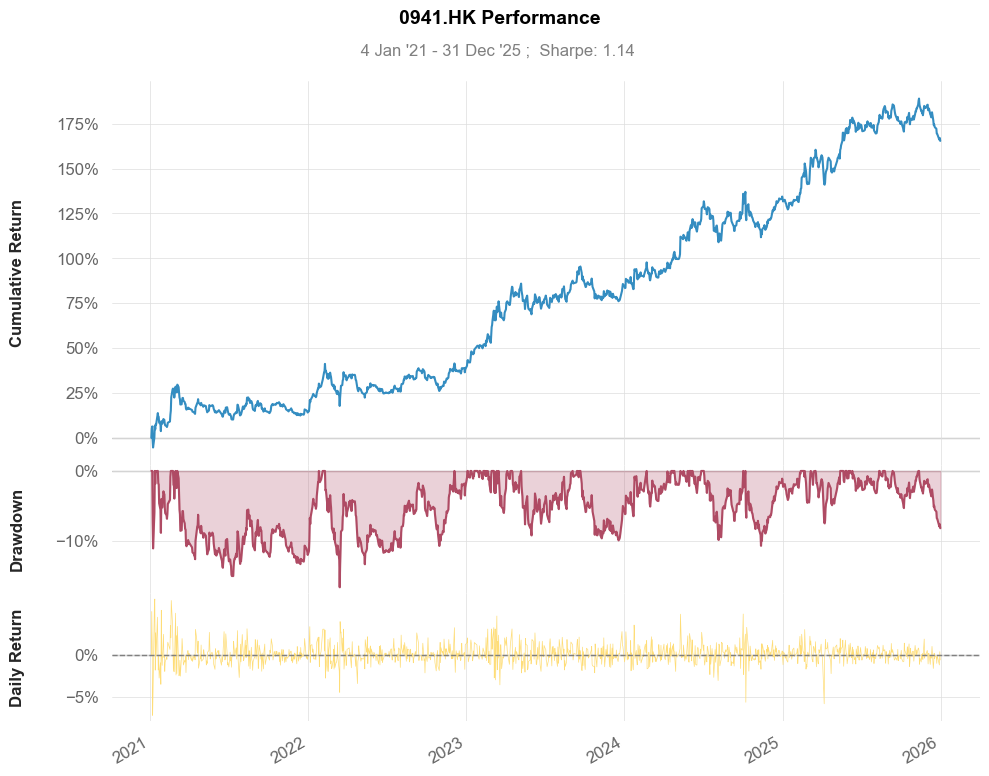

In [10]:
stock.plot_snapshot(title=f'{ticker} Performance', show=True)

In [11]:
qs.reports.metrics(stock, mode='basic')

                    Strategy
------------------  ----------
Start Period        2021-01-05
End Period          2025-12-31
Risk-Free Rate      0.0%
Time in Market      97.0%

Cumulative Return   165.38%
CAGR﹪              14.46%

Sharpe              1.14
Prob. Sharpe Ratio  99.46%
Sortino             1.82
Sortino/√2          1.29
Omega               1.23

Max Drawdown        -16.58%
Longest DD Days     324

Gain/Pain Ratio     0.23
Gain/Pain (1M)      1.74

Payoff Ratio        1.26
Profit Factor       1.23
Common Sense Ratio  1.53
CPC Index           0.77
Tail Ratio          1.25
Outlier Win Ratio   3.83
Outlier Loss Ratio  3.5

MTD                 -6.53%
3M                  -3.89%
6M                  -2.5%
YTD                 13.21%
1Y                  13.73%
3Y (ann.)           14.31%
5Y (ann.)           13.48%
10Y (ann.)          14.46%
All-time (ann.)     14.46%

Avg. Drawdown       -3.71%
Avg. Drawdown Days  33
Recovery Factor     6.43
Ulcer Index         0.06
Serenity Index      1

In [12]:
qs.reports.metrics(stock, mode='full')

                           Strategy
-------------------------  ----------
Start Period               2021-01-05
End Period                 2025-12-31
Risk-Free Rate             0.0%
Time in Market             97.0%

Cumulative Return          165.38%
CAGR﹪                     14.46%

Sharpe                     1.14
Prob. Sharpe Ratio         99.46%
Smart Sharpe               1.12
Sortino                    1.82
Smart Sortino              1.79
Sortino/√2                 1.29
Smart Sortino/√2           1.27
Omega                      1.23

Max Drawdown               -16.58%
Longest DD Days            324
Volatility (ann.)          19.2%
Calmar                     0.87
Skew                       0.44
Kurtosis                   4.66

Expected Daily %           0.08%
Expected Monthly %         1.64%
Expected Yearly %          21.55%
Kelly Criterion            9.16%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.9%
Expected Shortfall (cVaR)  -1.9%

Max Consecutive Wins       8

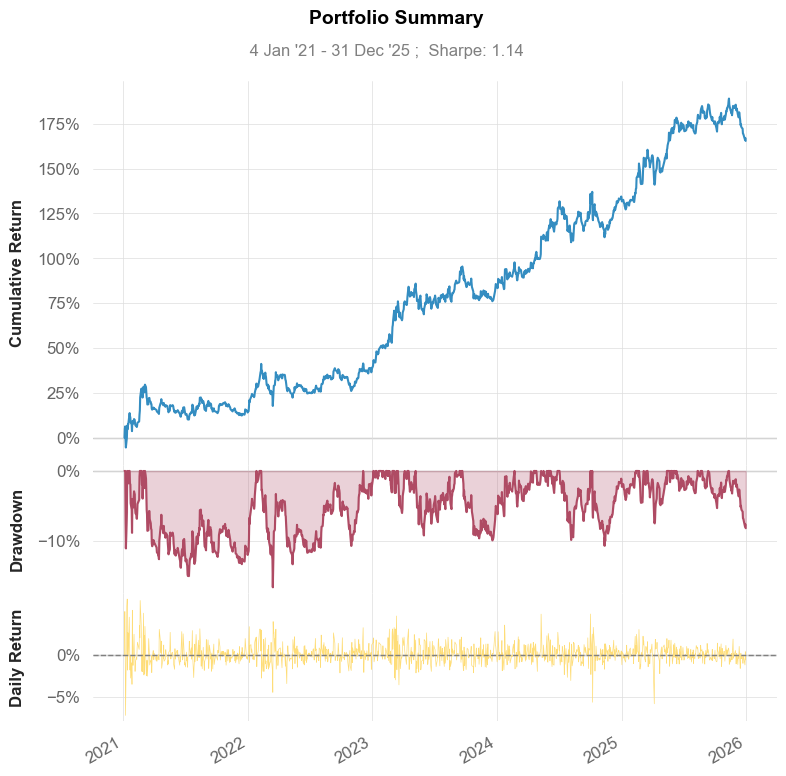

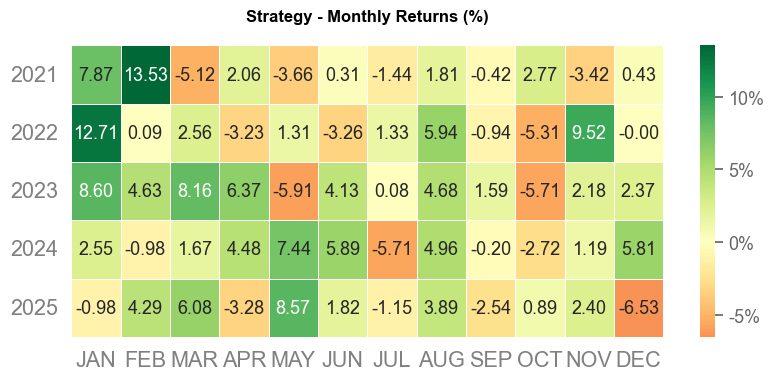

In [13]:
qs.reports.plots(stock, mode='basic')

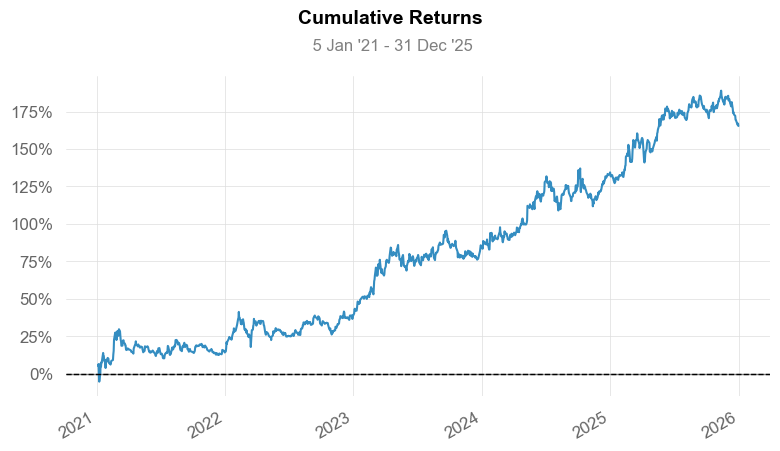

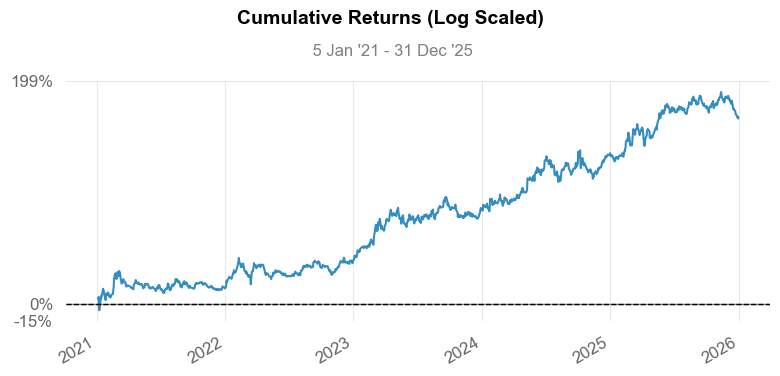

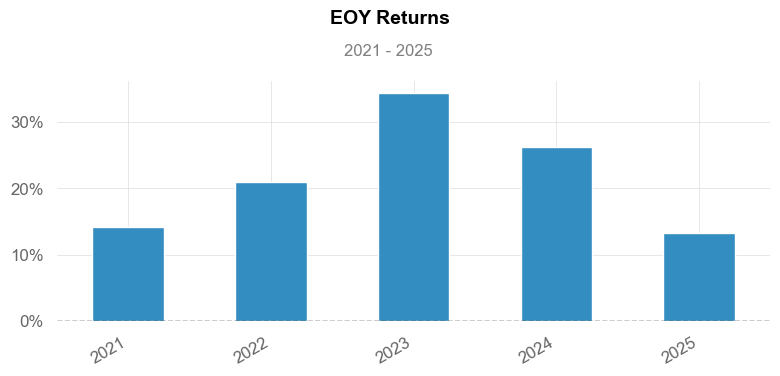

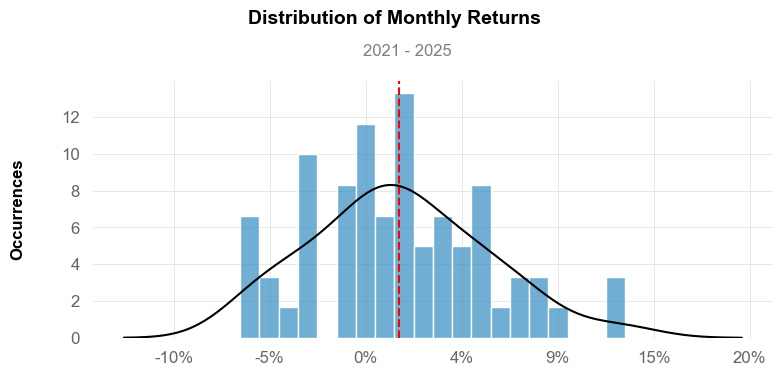

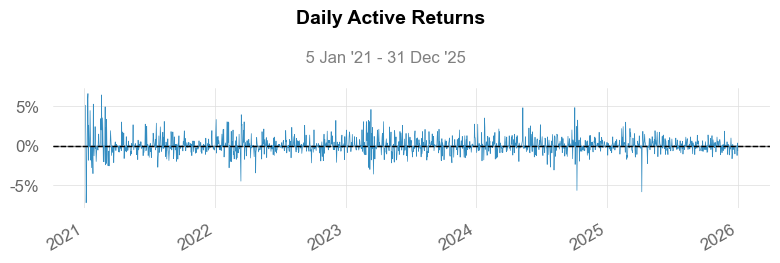

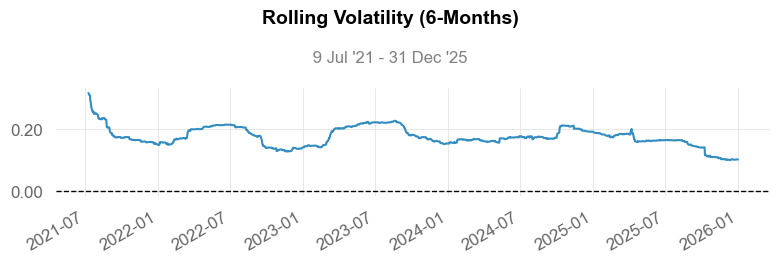

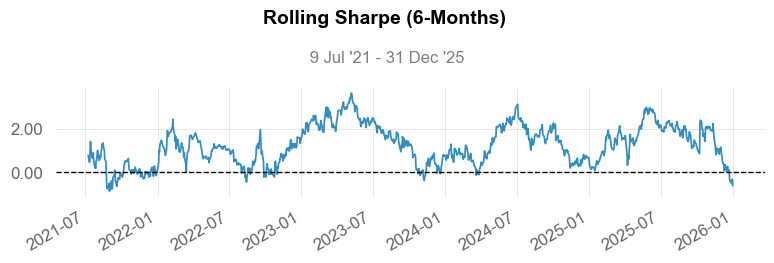

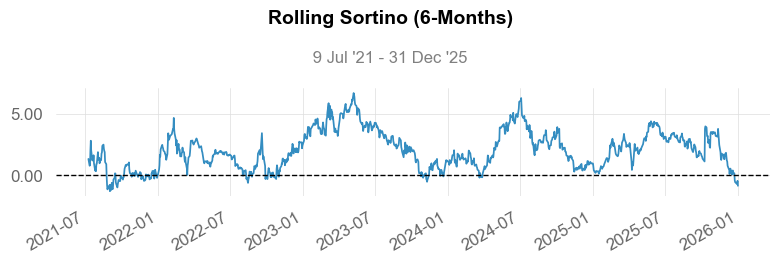

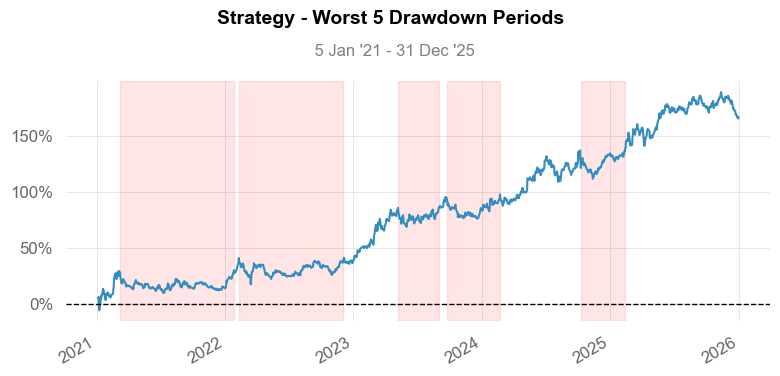

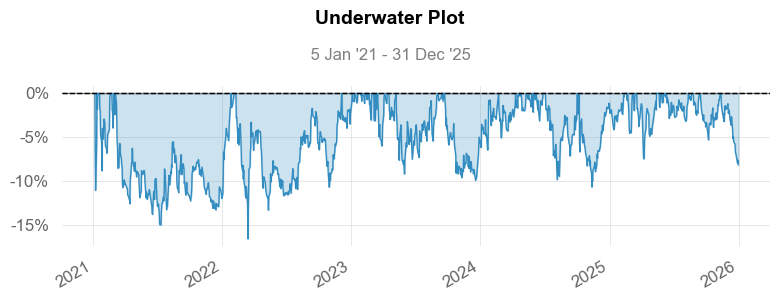

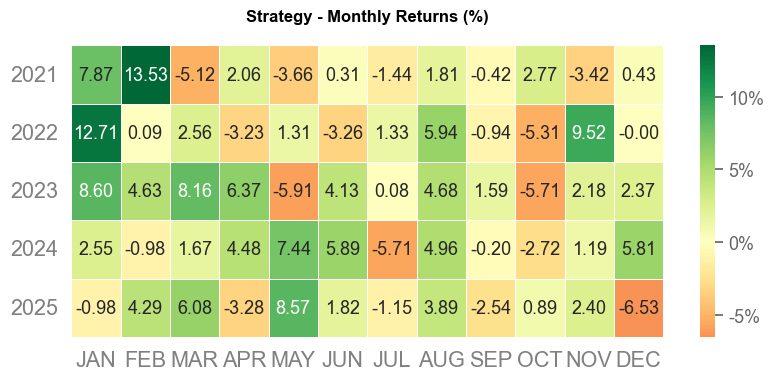

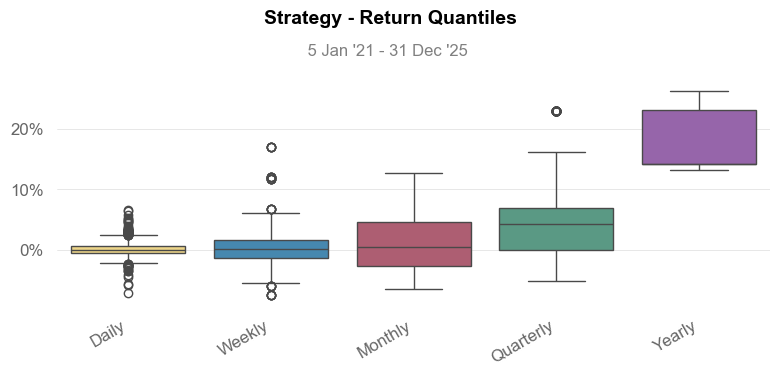

In [14]:
qs.reports.plots(stock, mode='full')

In [15]:
help(qs.stats)

Help on module QuantstatsReload.stats in QuantstatsReload:

NAME
    QuantstatsReload.stats

DESCRIPTION
    # -*- coding: UTF-8 -*-
    #
    # QuantStats: Portfolio analytics for quants
    # https://github.com/ranaroussi/quantstats
    #
    # Copyright 2019-2024 Ran Aroussi
    #
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.

FUNCTIONS
    adjusted_sortino(returns, rf=0, periods=252, annualize=True, smart=False)
        Jack Schwager's version of the